### Prophet Quick Start

In [2]:
import pandas as pd
from prophet import Prophet

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [13]:
model = Prophet(growth='linear')
model.fit(df)

# future: just ds
# forecast: predictions of future dates
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

print(list(forecast.columns))

22:18:24 - cmdstanpy - INFO - Chain [1] start processing
22:18:24 - cmdstanpy - INFO - Chain [1] done processing


['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper', 'additive_terms', 'additive_terms_lower', 'additive_terms_upper', 'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat']


In [7]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(3)

,ds,yhat,yhat_lower,yhat_upper
3267,2017-01-17,8.322712,7.575992,9.012301
3268,2017-01-18,8.155345,7.417008,8.872925
3269,2017-01-19,8.167304,7.433554,8.921470


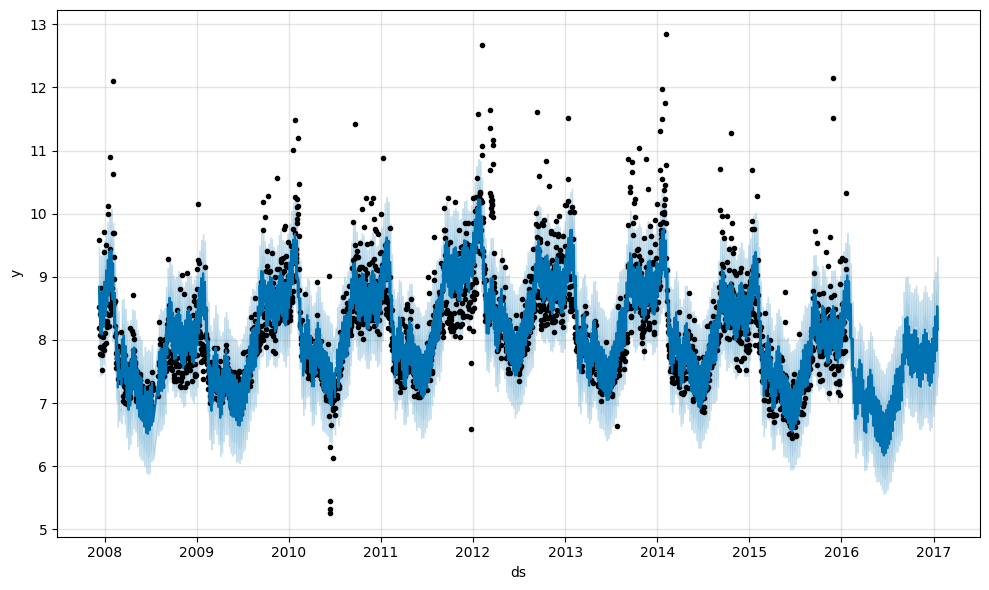

In [10]:
# plot
fig1 = model.plot(forecast)

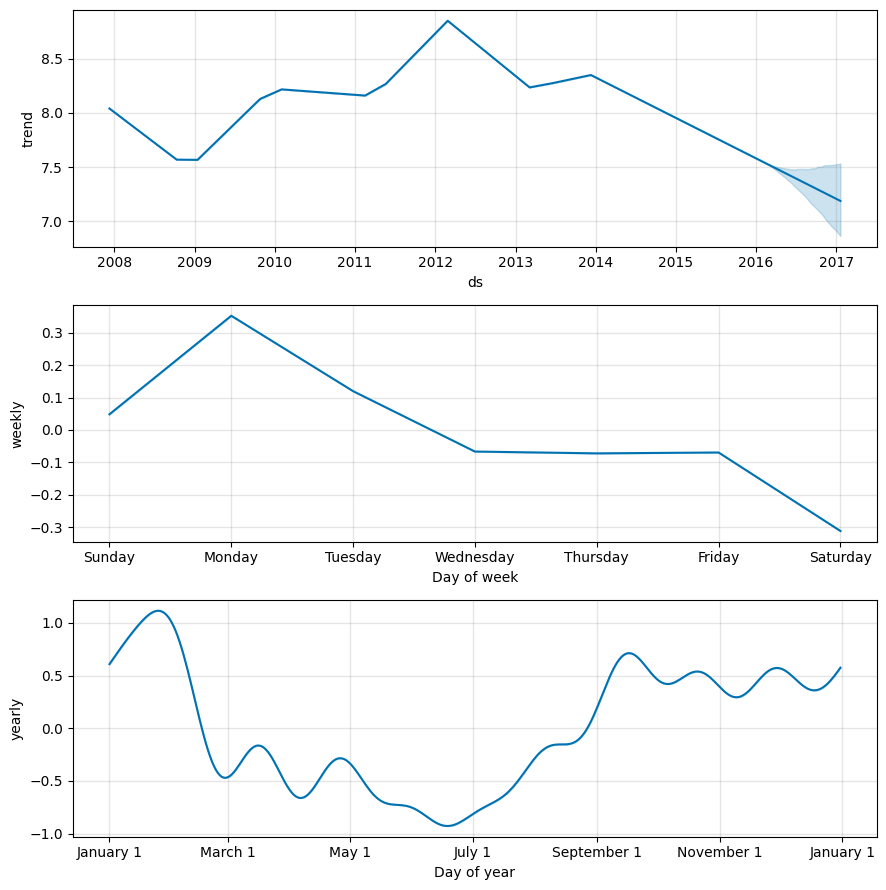

In [11]:
# get trend, seasonality(weekly, yearly)
fig2 = model.plot_components(forecast)